<a href="https://colab.research.google.com/github/syilmazs/MachineLearning/blob/main/used_car_price_prediction_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats.mstats import winsorize
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

# Data Gathering

In [3]:
df = pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Preparation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [6]:
df["Age"] = 2018 - (df.Year)

In [7]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,4
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,5
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,7
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,4


In [8]:
df["Car_Name"].value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Bajaj Avenger 150 street     1
KTM 390 Duke                 1
Bajaj Pulsar  NS 200         1
Activa 4g                    1
s cross                      1
Name: Car_Name, Length: 98, dtype: int64

In [9]:
df.drop(["Year", "Car_Name"], axis=1, inplace=True)

In [10]:
df.sample()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
58,4.1,6.8,39485,Petrol,Dealer,Manual,1,4


In [11]:
df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [12]:
df.Seller_Type.unique()

array(['Dealer', 'Individual'], dtype=object)

In [13]:
df.Owner.unique()

array([0, 1, 3])

In [14]:
df.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [15]:
df = pd.get_dummies(df, columns=["Transmission", "Fuel_Type", "Seller_Type"], drop_first=True)

In [16]:
df.sample(5)

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual
120,1.05,1.260,5700,0,2,1,0,1,1
278,6.00,8.400,4000,0,2,1,0,1,0
105,1.35,2.370,21700,0,3,1,0,1,1
163,0.45,0.950,27000,0,8,1,0,1,1
175,0.38,0.787,75000,0,7,1,0,1,1


In [17]:
df.shape

(301, 9)

# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


### Features and target variable

In [18]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,-0.367128,0.552339,-0.540571,-0.550724
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,-0.348715,0.473306,-0.465244,-0.512030
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,-0.162510,0.172515,-0.172874,-0.101419
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.050316,-0.053469,0.055687,0.124269
Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.000394,-0.064315,0.059959,0.039896
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,1.000000,-0.098643,0.091013,0.063240
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,-0.098643,1.000000,-0.979648,-0.350467
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,0.091013,-0.979648,1.000000,0.358321
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,0.063240,-0.350467,0.358321,1.000000


In [19]:
def color_red(cor):
    
    if cor > 0.70 and cor < 1.0:
        color = 'red'
    elif cor < -0.70 and cor > -1.0:
        color = 'red'
    elif cor == 1.0:
        color = 'orange'
    else:
        color = 'black'
    return f'color: {color}'
df.corr().style.applymap(color_red)

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,-0.367128,0.552339,-0.540571,-0.550724
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,-0.348715,0.473306,-0.465244,-0.512030
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,-0.162510,0.172515,-0.172874,-0.101419
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.050316,-0.053469,0.055687,0.124269
Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.000394,-0.064315,0.059959,0.039896
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,1.000000,-0.098643,0.091013,0.063240
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,-0.098643,1.000000,-0.979648,-0.350467
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,0.091013,-0.979648,1.000000,0.358321
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,0.063240,-0.350467,0.358321,1.000000


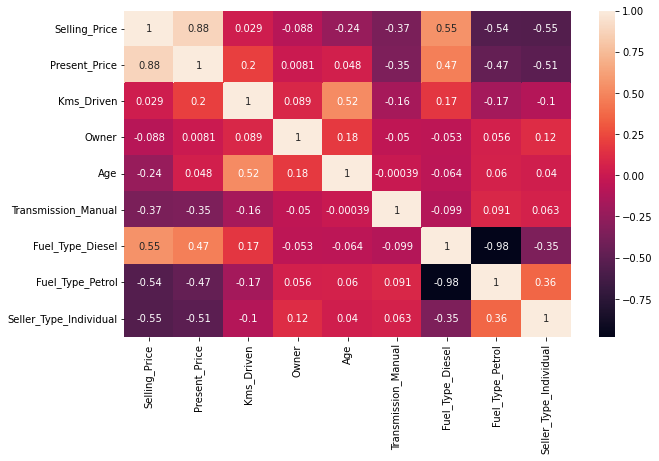

In [21]:
sns.heatmap(df.corr(), annot = True)

In [22]:
X = df.drop(columns ="Selling_Price")
y = df["Selling_Price"]

### Splitting data into training and testing

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =42)

In [26]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (225, 8)
Train target shape   :  (225,)
Test features shape  :  (76, 8)
Test target shape    :  (76,)


##  Model Building (Linear Regression)

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = MinMaxScaler()

In [29]:
scaler.fit(X_train)

MinMaxScaler()

In [30]:
X_train_scaled = scaler.transform(X_train)  
X_train_scaled

array([[0.00563502, 0.00900901, 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.15680537, 0.02482482, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.06906907, 0.        , ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.03391851, 0.03203203, 0.33333333, ..., 0.        , 1.        ,
        1.        ],
       [0.10489814, 0.13781982, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.01582141, 0.00700701, 0.        , ..., 0.        , 1.        ,
        1.        ]])

In [32]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.00270915,  0.04704705,  0.        ,  0.07142857,  0.        ,
         0.        ,  1.        ,  1.        ],
       [ 0.14390984,  0.02098098,  0.        ,  0.07142857,  1.        ,
         0.        ,  1.        ,  0.        ],
       [ 0.09839619,  0.11911912,  0.        ,  0.35714286,  1.        ,
         1.        ,  0.        ,  0.        ],
       [ 0.00270915,  0.06906907,  0.33333333,  0.42857143,  1.        ,
         0.        ,  1.        ,  1.        ],
       [ 0.19820113,  0.07908108,  0.        ,  0.28571429,  1.        ,
         0.        ,  1.        ,  0.        ],
       [ 0.09319463,  0.08381782,  0.        ,  0.14285714,  1.        ,
         1.        ,  0.        ,  0.        ],
       [ 0.01246207,  0.05105105,  0.        ,  0.14285714,  1.        ,
         0.        ,  1.        ,  1.        ],
       [ 0.00606849,  0.01501502,  0.        ,  0.21428571,  1.        ,
         0.        ,  1.        ,  1.        ],
       [ 0.00238405,  0.02702703

In [33]:
from sklearn.linear_model import LinearRegression

In [35]:
lm = LinearRegression()
lm

LinearRegression()

In [36]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [37]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [39]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.882940,0.877028
mae,1.163276,1.228325
mse,2.944704,3.378565
rmse,1.716014,1.838087


In [41]:
lm.coef_

array([39.12793117, -2.70720041, -3.03404944, -5.13433014, -1.55569004,
        2.52959125,  0.76931214, -1.2626059 ])

In [42]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual
177,0.35,2.885869,-2.535869
289,10.11,8.188242,1.921758
228,4.95,6.435035,-1.485035
198,0.15,-1.574478,1.724478
60,6.95,9.055046,-2.105046
...,...,...,...
22,4.40,5.328528,-0.928528
286,5.65,5.676038,-0.026038
56,4.50,4.977324,-0.477324
239,2.00,2.764102,-0.764102


#Model Evaluation

In [43]:
result_sample = comparing.sample(25)
result_sample

,Actual,Pred,Residual
25,3.00,2.654913,0.345087
173,0.40,3.350196,-2.950196
42,1.95,2.264615,-0.314615
78,5.25,11.083070,-5.833070
140,0.60,0.453735,0.146265
167,0.42,0.600910,-0.180910
289,10.11,8.188242,1.921758
267,8.35,8.121847,0.228153
248,4.00,3.168826,0.831174
7,6.50,7.344289,-0.844289


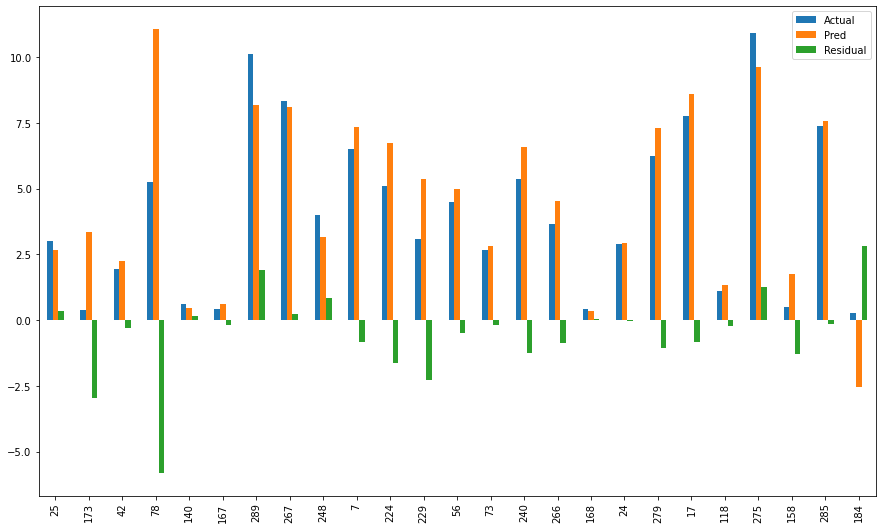

In [44]:
result_sample.plot(kind ="bar", figsize=(15,9))
plt.show()

In [45]:
residuals = y_test-y_pred

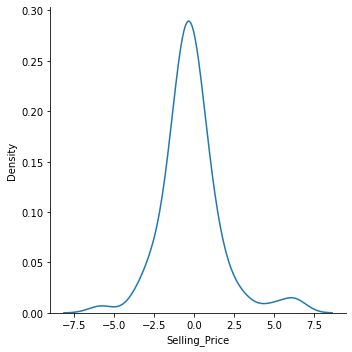

In [46]:
sns.displot(residuals, kind="kde");

In [48]:
R2_score = r2_score(y_test, y_pred) 
R2_score

0.8770281948906468

In [49]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [50]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8770281948906468
MAE 		: 1.2283245143225237
MSE 		: 3.378564707950658
RMSE 		: 1.8380872416592902


In [59]:
y_train_pred = lm.predict(X_train_scaled)

In [60]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8829395727043557
MAE 		: 1.163276211271992
MSE 		: 2.944703613033394
RMSE 		: 1.7160138732053987


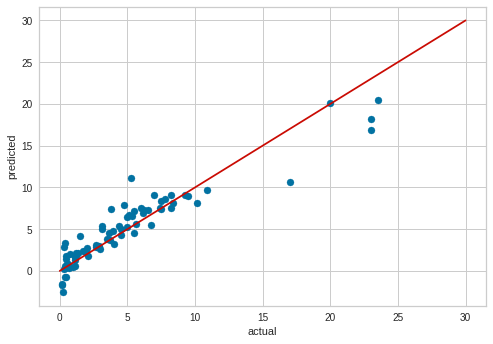

In [61]:
plt.scatter(y_test, y_pred)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.plot([0,30], [0,30], "r")

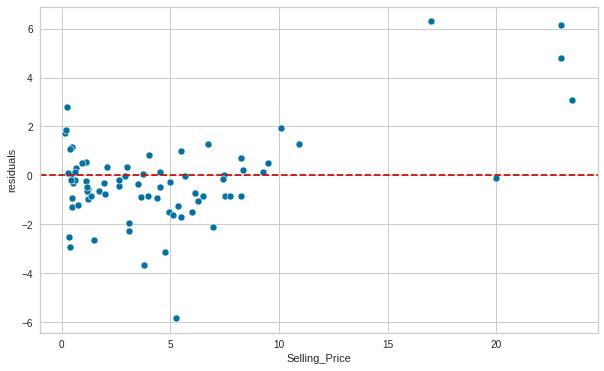

In [62]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

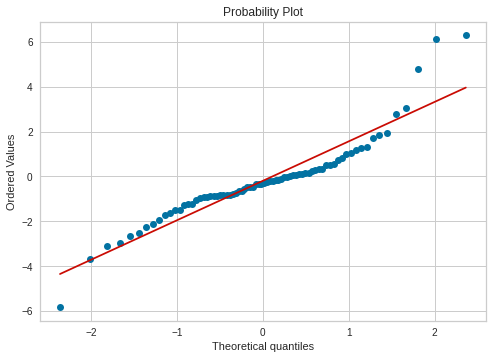

In [63]:
stats.probplot(residuals, dist ="norm", plot =plt);

In [64]:
from yellowbrick.regressor import ResidualsPlot

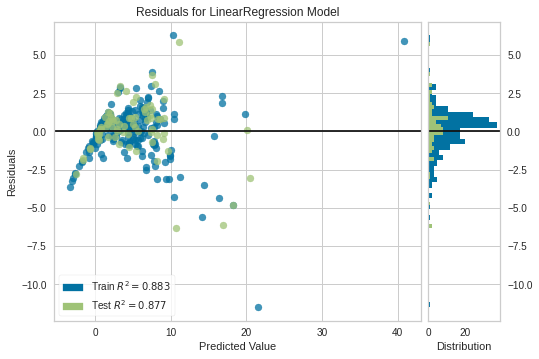

In [65]:
lm = LinearRegression()
visualizer = ResidualsPlot(lm)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();        # Finalize and render the figure

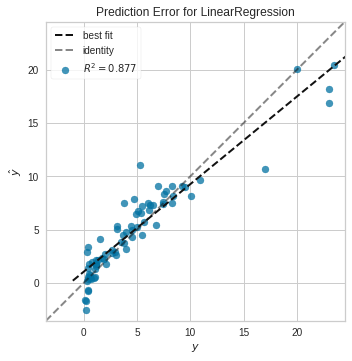

In [66]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
lm = LinearRegression()
visualizer = PredictionError(lm)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();  

In [67]:
from sklearn.model_selection import cross_validate, cross_val_score

In [71]:
lm = LinearRegression()
scores = cross_validate(lm, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

In [73]:
pd.DataFrame(scores, index = range(1,11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.001931,0.002235,0.787837,-1.493040,-5.233773,-2.287744
2,0.002831,0.001969,0.833024,-1.777425,-10.904358,-3.302175
3,0.001243,0.001211,0.744250,-0.985946,-1.835898,-1.354953
4,0.000862,0.001154,0.615509,-1.570008,-4.380717,-2.093016
5,0.000764,0.001162,0.908810,-0.910328,-1.995391,-1.412583
6,0.000802,0.001142,0.935047,-0.910817,-1.095594,-1.046706
7,0.000755,0.001167,0.801636,-1.552596,-8.813761,-2.968798
8,0.000793,0.001143,0.725367,-1.076204,-3.008823,-1.734596
9,0.000785,0.001193,0.885845,-1.340482,-3.031236,-1.741045
10,0.000792,0.001137,0.864855,-0.919926,-1.299339,-1.139886


In [74]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_r2                             0.810218
test_neg_mean_absolute_error       -1.253677
test_neg_mean_squared_error        -4.159889
test_neg_root_mean_squared_error   -1.908150
dtype: float64

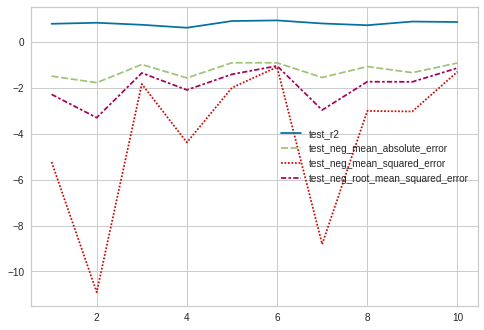

In [76]:
sns.lineplot(data = scores.iloc[:,2:]);

# Interpret the model

Model looks good fit to the data. There is not overfitting and underfitting issues. However it can be developed by regularization. 

# Model Evaluation

# Regularization

# Ridge

In [77]:
from sklearn.linear_model import Ridge

In [78]:
ridge_model = Ridge(alpha=1, random_state=42)

In [79]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [80]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [81]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge") 
rs

,ridge_train,ridge_test
R2,0.816034,0.812492
mae,1.409496,1.448459
mse,4.627747,5.151661
rmse,2.151220,2.269727


In [82]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.882940,0.877028,0.816034,0.812492
mae,1.163276,1.228325,1.409496,1.448459
mse,2.944704,3.378565,4.627747,5.151661
rmse,1.716014,1.838087,2.151220,2.269727


In [83]:
model = Ridge(alpha=1, random_state=5) 
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [84]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.004003,0.002345,0.794272,-1.462251,-5.075028,-2.252782
2,0.002151,0.002121,0.764538,-2.397466,-15.376849,-3.921333
3,0.001115,0.001192,0.560459,-1.264774,-3.155235,-1.776298
4,0.001019,0.001228,0.548774,-1.867589,-5.141068,-2.267392
5,0.001022,0.001172,0.864495,-0.937351,-2.965098,-1.721946
6,0.001041,0.001179,0.832328,-1.315880,-2.828190,-1.681722
7,0.000980,0.001147,0.675392,-2.031086,-14.423070,-3.797772
8,0.000964,0.001140,0.647531,-1.503130,-3.861576,-1.965089
9,0.000985,0.001160,0.875685,-1.342934,-3.301002,-1.816866
10,0.000986,0.001156,0.786711,-1.028181,-2.050655,-1.432011


In [85]:
scores = pd.DataFrame(scores, index = range(1, 11)) 
scores.iloc[:,2:].mean()

test_r2                             0.735018
test_neg_mean_absolute_error       -1.515064
test_neg_mean_squared_error        -5.817777
test_neg_root_mean_squared_error   -2.263321
dtype: float64

In [87]:
from sklearn.linear_model import RidgeCV

In [96]:
alpha_space = np.linspace(0.1, 1, 100)
alpha_space

array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.38181818, 0.39090909, 0.4       , 0.40909091,
       0.41818182, 0.42727273, 0.43636364, 0.44545455, 0.45454545,
       0.46363636, 0.47272727, 0.48181818, 0.49090909, 0.5       ,
       0.50909091, 0.51818182, 0.52727273, 0.53636364, 0.54545455,
       0.55454545, 0.56363636, 0.57272727, 0.58181818, 0.59090909,
       0.6       , 0.60909091, 0.61818182, 0.62727273, 0.63636364,
       0.64545455, 0.65454545, 0.66363636, 0.67272727, 0.68181818,
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272

In [98]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 10, scoring= "neg_root_mean_squared_error")

In [99]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.381818...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [100]:
ridge_cv_model.alpha_

0.14545454545454545

In [101]:
ridge_cv_model.best_score_

-1.7906599464112933

In [102]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [103]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.879144,0.868172
mae,1.189737,1.263949
mse,3.040184,3.621874
rmse,1.743612,1.903122


In [104]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.882940,0.877028,0.816034,0.812492,0.879144,0.868172
mae,1.163276,1.228325,1.409496,1.448459,1.189737,1.263949
mse,2.944704,3.378565,4.627747,5.151661,3.040184,3.621874
rmse,1.716014,1.838087,2.151220,2.269727,1.743612,1.903122


# Lasso

In [105]:
from sklearn.linear_model import Lasso, LassoCV

In [106]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [107]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [108]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.123966,0.122134
mae,3.041904,3.221916
mse,22.036991,24.118765
rmse,4.694357,4.911086


In [109]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.882940,0.877028,0.816034,0.812492,0.879144,0.868172,0.123966,0.122134
mae,1.163276,1.228325,1.409496,1.448459,1.189737,1.263949,3.041904,3.221916
mse,2.944704,3.378565,4.627747,5.151661,3.040184,3.621874,22.036991,24.118765
rmse,1.716014,1.838087,2.151220,2.269727,1.743612,1.903122,4.694357,4.911086


In [110]:
model = Lasso(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [111]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.001812,0.002134,0.137569,-3.438456,-21.274996,-4.612483
2,0.002056,0.002274,0.007171,-5.052171,-64.836703,-8.052124
3,0.001845,0.001261,-0.106482,-2.594865,-7.942858,-2.818308
4,0.001164,0.001234,0.256573,-2.409981,-8.470278,-2.910374
5,0.001101,0.001176,0.123385,-2.791489,-19.181910,-4.379716
6,0.001053,0.001208,0.156772,-2.428900,-14.223030,-3.771343
7,0.001039,0.001220,0.028783,-3.422057,-43.153372,-6.569123
8,0.001018,0.001163,-0.169668,-2.676915,-12.814631,-3.579753
9,0.001050,0.001302,0.029453,-3.786762,-25.771496,-5.076563
10,0.001075,0.001181,0.273551,-2.252116,-6.984388,-2.642799


In [112]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                              0.073711
test_neg_mean_absolute_error        -3.085371
test_neg_mean_squared_error        -22.465366
test_neg_root_mean_squared_error    -4.441259
dtype: float64

In [130]:
lasso_model.coef_

array([ 0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -1.35031466])

In [114]:
lasso_cv_model = LassoCV( cv = 10, max_iter=100000, random_state=42)

In [115]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(cv=10, max_iter=100000, random_state=42)

In [116]:
lasso_cv_model.alpha_

0.026309006079107855

In [117]:
lasso_cv_model.mse_path_[-1].mean()

4.094498599479063

In [118]:
y_pred = lasso_cv_model.predict(X_test_scaled)  
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [119]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.874045,0.865978
mae,1.172058,1.248272
mse,3.168459,3.682173
rmse,1.780017,1.918899


In [120]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.882940,0.877028,0.816034,0.812492,0.879144,0.868172,0.123966,0.122134,0.874045,0.865978
mae,1.163276,1.228325,1.409496,1.448459,1.189737,1.263949,3.041904,3.221916,1.172058,1.248272
mse,2.944704,3.378565,4.627747,5.151661,3.040184,3.621874,22.036991,24.118765,3.168459,3.682173
rmse,1.716014,1.838087,2.151220,2.269727,1.743612,1.903122,4.694357,4.911086,1.780017,1.918899


In [129]:
lasso_cv_model.coef_

array([34.88180738, -0.        , -0.        , -5.16702536, -1.46368763,
        1.91399766, -0.        , -1.5334208 ])

## Elastic-Net 

In [152]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [153]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=42)

In [154]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [155]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.184431,0.192168
mae,2.976123,3.073580
mse,20.515987,22.194625
rmse,4.529458,4.711117


In [126]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.882940,0.877028,0.816034,0.812492,0.879144,0.868172,0.123966,0.122134,0.874045,0.865978,0.184431,0.192168
mae,1.163276,1.228325,1.409496,1.448459,1.189737,1.263949,3.041904,3.221916,1.172058,1.248272,2.976123,3.073580
mse,2.944704,3.378565,4.627747,5.151661,3.040184,3.621874,22.036991,24.118765,3.168459,3.682173,20.515987,22.194625
rmse,1.716014,1.838087,2.151220,2.269727,1.743612,1.903122,4.694357,4.911086,1.780017,1.918899,4.529458,4.711117


Choosing best alpha and l1_ratio values with Cross-Validation

In [182]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 10, 
                                max_iter = 100000,random_state=42)

In [183]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.3...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
             cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [184]:
elastic_cv_model.alpha_

0.1

In [185]:
elastic_cv_model.l1_ratio_

1.0

In [186]:
elastic_cv_model.mse_path_[5][-1].mean()

6.385158908692639

In [187]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [188]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.814563,0.795535
mae,1.348979,1.429285
mse,4.664753,5.617544
rmse,2.159804,2.370136


In [189]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
R2,0.882940,0.877028,0.816034,0.812492,0.879144,0.868172,0.123966,0.122134,0.874045,0.865978,0.184431,0.192168,0.814563,0.795535
mae,1.163276,1.228325,1.409496,1.448459,1.189737,1.263949,3.041904,3.221916,1.172058,1.248272,2.976123,3.073580,1.348979,1.429285
mse,2.944704,3.378565,4.627747,5.151661,3.040184,3.621874,22.036991,24.118765,3.168459,3.682173,20.515987,22.194625,4.664753,5.617544
rmse,1.716014,1.838087,2.151220,2.269727,1.743612,1.903122,4.694357,4.911086,1.780017,1.918899,4.529458,4.711117,2.159804,2.370136


In [190]:
elastic_cv_model.coef_

array([23.81229305, -0.        , -0.        , -2.97938024, -1.64756413,
        2.46963357, -0.        , -2.20398314])

Grid Search

In [191]:
from sklearn.model_selection import GridSearchCV

In [192]:
elastic_model = ElasticNet(max_iter=10000, random_state=42) 

In [193]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [194]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [195]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01,

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [196]:
grid_model.best_params_

{'alpha': 0.012, 'l1_ratio': 0.95}

In [198]:
grid_model.best_score_

-1.845349373150859

In [200]:
y_pred = grid_model.predict(X_test_scaled) 
y_train_pred = grid_model.predict(X_train_scaled)

In [203]:
gs = train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")
gs

,GridSearch_train,GridSearch_test
R2,0.874338,0.863563
mae,1.189871,1.271651
mse,3.161067,3.748518
rmse,1.777939,1.936109


In [204]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs, gs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test,GridSearch_train,GridSearch_test
R2,0.882940,0.877028,0.816034,0.812492,0.879144,0.868172,0.123966,0.122134,0.874045,0.865978,0.184431,0.192168,0.814563,0.795535,0.874338,0.863563
mae,1.163276,1.228325,1.409496,1.448459,1.189737,1.263949,3.041904,3.221916,1.172058,1.248272,2.976123,3.073580,1.348979,1.429285,1.189871,1.271651
mse,2.944704,3.378565,4.627747,5.151661,3.040184,3.621874,22.036991,24.118765,3.168459,3.682173,20.515987,22.194625,4.664753,5.617544,3.161067,3.748518
rmse,1.716014,1.838087,2.151220,2.269727,1.743612,1.903122,4.694357,4.911086,1.780017,1.918899,4.529458,4.711117,2.159804,2.370136,1.777939,1.936109


As we can see from above table the best model is the linear model which is the first model. It has the best R2 score (0.877) and the lowest rmse score (1.838. However, the scores deteriorated after cross validation.

#FINAL MODEL

In [205]:
final_scaler = MinMaxScaler()
X_scaled = final_scaler.fit_transform(X)

In [206]:
final_model = lm

In [207]:
final_model.fit(X_scaled, y)

LinearRegression()